# Script to explore radar picks

## Import packages

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
from haversine import haversine, Unit
import numpy as np
import pandas as pd

# complicated plotting
import rasterio
from rasterio.plot import show
import pyproj

# geospatial plotting
from geopy.distance import distance
from geopy import Point


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## set basic parameters

In [17]:

# define cores

class core:
    def __init__(self, name, lat, lon, depth):
        self.name = name
        self.lat = lat
        self.lon = lon
        self.depth = depth

    def get_dist_to_track(self,lat,lon):

        self.track_dist=10000
        for i in range(len(lat)):
            d = haversine((lat[i],lon[i]),(self.lat,self.lon),unit=Unit.METERS)
            if d < self.track_dist:
                self.track_dist = d
                self.track_idx = i

ALHIC2302 = core('ALHIC2302',-76.74543,159.37513, 143)
ALHIC2201 = core('ALHIC2201',-76.732027,159.359551, 90)
ALHIC1902 = core('ALHIC1902',-76.745357,159.374108, 206.53)
ALHIC1901 = core('ALHIC1901',-76.732376,159.356125, 159.84)


## Basic data import and exploration

In [19]:
# Function to load the shapefile and check basic information
def load_shapefile(file_path):
    try:
        # Load the shapefile using geopandas
        gdf = gpd.read_file(file_path)
        
        # Display basic information about the data
        print("Loaded shapefile successfully!")
        print("Number of features:", len(gdf))
        print("CRS (Coordinate Reference System):", gdf.crs)
        print("First few rows of the data:")
        print(gdf.head())
        
        # Show the columns in the shapefile
        print("\nColumns in the shapefile:")
        print(gdf.columns)

        # You can access the geometry (the spatial component) and attributes here
        print("\nSample geometry:")
        print(gdf.geometry.head())

    except Exception as e:
        print(f"Error loading shapefile: {e}")

    return gdf

# Provide the path to the .shp file
#shapefile_path = "../../../radar_picks/picks-v2-culled-2melev.shp"
shapefile_path = "../../../radar_picks/picks-v2-culled.shp"
gdf = load_shapefile(shapefile_path)


Loaded shapefile successfully!
Number of features: 26422
CRS (Coordinate Reference System): EPSG:3031
First few rows of the data:
  Filename  St. Scan  End Scan      Lat()      Long() Layer 1 Na  Layer 1 Sc  \
0     None         0      6008 -76.733516  159.345061    Layer 1        1640   
1     None         0      6008 -76.733500  159.345184    Layer 1        1650   
2     None         0      6008 -76.733482  159.345314    Layer 1        1660   
3     None         0      6008 -76.733463  159.345453    Layer 1        1670   
4     None         0      6008 -76.733446  159.345595    Layer 1        1680   

   Layer 1 De  Layer 1 2-  Layer 1 La Layer 2 Na  Layer 2 Sc Layer 2 2-  \
0     296.246     3485.24        3.11    Layer 2        1640       None   
1     293.899     3457.63        3.11    Layer 2        1650       None   
2     290.823     3421.45        3.11    Layer 2        1660       None   
3     288.557     3394.79        3.11    Layer 2        1670       None   
4     285.805 

In [22]:
# import math

# # Get the first and last points
# # calculate bering, from https://spatial-dev.guru/2024/04/06/python-tutorial-calculating-azimuth-elevation-and-slant-range-between-two-points-on-earth/
# def calculate_bearing(lat1, lon1, lat2, lon2):
#     # Convert decimal degrees to radians
#     lat1_rad = math.radians(lat1)
#     lon1_rad = math.radians(lon1)
#     lat2_rad = math.radians(lat2)
#     lon2_rad = math.radians(lon2)
 
#     dlon = lon2_rad - lon1_rad
 
#     y = math.sin(dlon) * math.cos(lat2_rad)
#     x = math.cos(lat1_rad) *  math.sin(lat2_rad) - \
#         math.sin(lat1_rad) * math.cos(lat2_rad) * math.cos(dlon)
 
#     bearing_rad = math.atan2(y, x)
#     bearing_deg = math.degrees(bearing_rad)
 
#     # Normalize to [0, 360) degrees
#     bearing_deg = (bearing_deg + 360) % 360
 
#     return bearing_deg

# # Calculate the azimuth
# def calculate_azimuth(line,name):

#     start = (line.iloc[0]['Lat()'], line.iloc[0]['Long()'])
#     end = (line.iloc[-1]['Lat()'], line.iloc[-1]['Long()'])
#     lat1, lon1 = start
#     lat2, lon2 = end
#     azimuth = calculate_bearing(lat1, lon1, lat2, lon2)

#     print(f"The azimuth between the first and last point in "+name+" is "+str(round(azimuth,1))+" degrees or "+str(round((azimuth+180)%360,1))+" degrees.")
#     return azimuth

# azimuth = calculate_azimuth(line02,'Line 2')
# azimuth = calculate_azimuth(line23,'Line 23')




In [25]:
# set up for this plot - make transformer

# Define the EPSG code for the Antarctic Polar Stereographic projection
epsg_code = 'epsg:3031'

# Create a transformer object
transformer = pyproj.Transformer.from_crs('epsg:4326', epsg_code)


 Distance between ALHIC2302 and line is  24.835536765857537
 Distance between ALHIC1902 and line is  44.851048234582464
Bed slope near ALHIC2302 is  0.6426997198964646  or  32.728843665040266 °
 Distance between ALHIC2201 and line is  1.0039180865160766
 Distance between ALHIC1901 and line is  3.1895373898790425
Bed slope near ALHIC2201 is  0.5243448911765873  or  27.67004010623935 °


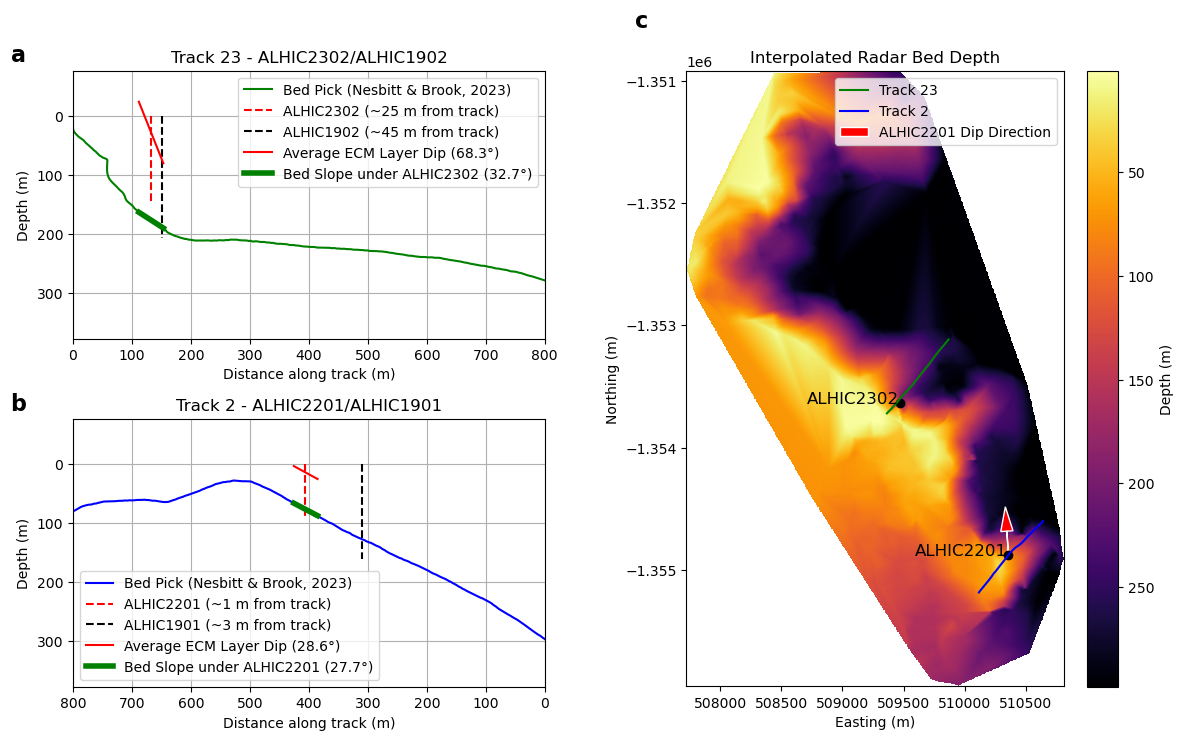

In [ ]:
# Make a figure

fig = plt.figure(figsize=(14,8))
gs = fig.add_gridspec(2, 2, width_ratios=[3, 3], height_ratios=[1, 1], wspace=0.3, hspace=0.3)

# Create the two wide but short subplots on the left
ax1 = fig.add_subplot(gs[0, 0])  # Top-left
ax2 = fig.add_subplot(gs[1, 0])  # Bottom-left

# Create the tall, narrow subplot on the right
ax3 = fig.add_subplot(gs[:, 1])  # Right side, spanning both rows



###############################################################################################################
# TOP AND  BOTTOM SUBPLOT

# save index of what shows up on plot
idx_lo = []
idx_hi = []

for line,name,ax,cores,core_angle,linestyle in zip([line23,line02],
                                         ['Track 23','Track 2'],
                                         [ax1,ax2],
                                         [[ALHIC2302,ALHIC1902],[ALHIC2201,ALHIC1901]],
                                         [alhic2302_angle,alhic2201_angle],
                                         ['g-','b-']):
    
    # calculate the mean angle for all sections where the IQR is less than 20 degrees
    valid_angles = []
    valid_depths = []
    for idx, row in core_angle.iterrows():

        if row['IQR'] < 20:
            valid_angles.append(row['median-dip'])
            valid_depths.append(row['depth'])
    if valid_angles:
        angle_mean = np.mean(abs(np.array(valid_angles)))
        angle_depth_mean = np.mean(valid_depths)
    else:
        print("ERROR: NO VALID ANGLES")

    # Get the latitude, longitude, and depth values
    lat = line['Lat()'].to_numpy()
    lon = line['Long()'].to_numpy()
    depth = line['Layer 1 De'].to_numpy()

    # find closest point on line
    for core in cores:
        core.get_dist_to_track(lat,lon)
        print(" Distance between "+core.name+" and line is ",core.track_dist)

    # compute distance along track
    dist = []
    for la,lo in zip(lat,lon):
        dist.append(haversine((lat[0],lon[0]),(la,lo),unit=Unit.METERS))

    # plot the data
    ax.plot(dist,depth,linestyle,label='Bed Pick (Nesbitt & Brook, 2023)')

    # plot core location
    color = ['r--','k--']
    for core,c in zip(cores,color):
        label = core.name + ' (~'+str(round(core.track_dist))+' m from track)'
        ax.plot([dist[core.track_idx],dist[core.track_idx]],[0,core.depth],c,label=label)

    # calculate the bed slope near the core
    core = cores[0] # pick relevant core
    idx = core.track_idx
    dist_min = dist[idx] - 20
    dist_max = dist[idx] + 20
    idx_min = int(round(np.interp(dist_min,dist,range(len(dist)))))
    idx_max = int(round(np.interp(dist_max,dist,range(len(dist)))))
    slope = abs((depth[idx_max] - depth[idx_min])/(dist[idx_max] - dist[idx_min]))
    dip = np.arctan(slope)*180/np.pi
    print('Bed slope near '+core.name+' is ',slope,' or ',dip,'°')

    # Plot ECM angle
    hor = (dist[idx_max] - dist[idx_min])/2
    if name == 'Track 23':
        mult = 1
    else:
        mult = -1
    offset = hor * np.tan(angle_mean*np.pi/180)
    ax.plot([dist[idx_min],dist[idx_max]],
            [angle_depth_mean-offset*mult,angle_depth_mean+offset*mult],
            'r',
            label = 'Average ECM Layer Dip ('+str(round(angle_mean,1))+'°)')


    # plot the bed slope
    ax.plot([dist[idx_min],dist[idx_max]],[depth[idx_min],depth[idx_max]],
            'g',
            label='Bed Slope under '+core.name+' ('+str(round(dip,1))+'°)',
            linewidth=4)

    # set axis to equal scale
    ax.axis('equal')

    # apply x axis limits
    if name == 'Track 23':
        ax.set_xlim(0,800)
        ax.legend(loc='upper right')
    else:
        ax.set_xlim(800,0)
        ax.legend(loc='lower left')

    idx_lo.append(dist.index(min(filter(lambda d: d > 0, dist))))
    idx_hi.append(dist.index(max(filter(lambda d: d < 800, dist))))

    # plot housekeeping
    title = name + ' - ' + cores[0].name +'/'+cores[1].name 
    ax.set_title(title)
    ax.set_xlabel('Distance along track (m)')
    ax.set_ylabel('Depth (m)')
    ax.set_ylim(300,0)
    ax.grid(True)

#fig.tight_layout()

#fig.savefig('../../../figures/paper_figures/radar.png')


################################################################################################################
# RIGHT SUBPLOT

# Open the file using rasterio
with rasterio.open('../../../radar_picks/test.tif') as src:
    # Plot the GeoTIFF
    show(src, ax=ax3, cmap='inferno_r')
    
    # Add colorbar
    cbar = plt.colorbar(ax3.images[0], ax=ax3, orientation='vertical')
    cbar.set_label('Depth (m)')
    cbar.ax.invert_yaxis()

#%% add info to the right subplot
for core in [ALHIC2302,ALHIC2201]:

    x,y = transformer.transform(core.lat,core.lon)

    ax3.plot(x, y, 'ko')
    ax3.text(x-10, y, core.name, fontsize=12, ha = 'right')
# for core in [ALHIC1901,ALHIC1902]:

#     x,y = transformer.transform(core.lat,core.lon)

#     ax3.plot(x, y, 'ko')
#     ax3.text(x-10, y+10, core.name, fontsize=12, ha = 'right')

cnt = 0
for line,linestyle,track_name in zip([line23,line02],['g-','b-'],['Track 23','Track 2']):
    
    lat = line['Lat()'].to_numpy()
    lon = line['Long()'].to_numpy()
    x,y = transformer.transform(lat,lon)

    ax3.plot(x[idx_lo[cnt]:idx_hi[cnt]], y[idx_lo[cnt]:idx_hi[cnt]], linestyle,label=track_name)

    cnt+=1


# Add title and labels
ax3.set_title('Interpolated Radar Bed Depth')
ax3.set_xlabel('Easting (m)')
ax3.set_ylabel('Northing (m)')

#%% do the arrow

# Define the distance and heading
d = 0.2 # distance in kilometers
h = 197  # heading in degrees (0 is north, 90 is east, etc.)

# Create a Point object for the starting location
start_point = Point(ALHIC2201.lat, ALHIC2201.lon)

# Use geopy's distance and heading to calculate the destination
destination = distance(kilometers=d).destination(start_point, h)

x1,y1 = transformer.transform(ALHIC2201.lat,ALHIC2201.lon)
x2,y2 = transformer.transform(destination.latitude,destination.longitude)

ax3.arrow(x1, y1, x2-x1, y2-y1, head_width=100, head_length=200, fc='r', ec='w', label='ALHIC2201 Dip Direction')

# Add labels a), b), and c) to the subplots
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')
ax3.text(-0.1, 1.1, 'c', transform=ax3.transAxes, fontsize=16, fontweight='bold', va='top', ha='right')

# Add a legend
ax3.legend()

# save the figure
fig.savefig('../../../figures/ah_24/radar.png')